#  MLP using Keras

**Approach**
- Load the iris dataset and split into X and Y
- Intialize network with 4 input parameters (features), 10 hidden nodes, and 3 output classes
- Use ReLU for hidden layers 0 and softmax for the outer layer since it is a multiclass prediction
- Cross Entropy loss function applied and optimzed with SGD

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

sns.set()
%matplotlib inline

In [52]:
df = pd.read_csv('./data/IRIS.csv')
df.head()
df.shape

(150, 5)

In [13]:
# one hot encoding to convert species to 0/1 matrix
one_hot_df = pd.get_dummies(df['species'], prefix = 'species')

one_hot_df.head()

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [16]:
# X and Y and the split
X = df.drop('species', axis = 1).values
Y = one_hot_df.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.2)


In [85]:
# Build MLP using keras library
# initialize model
model = models.Sequential(name = 'MLP')

# initialize parameters
n_hidden = 10  # number of nodes in hidden layer
n_input = 4   # number of input parameters
n_output = 3  # number of output parameters (number of classes to predict)

# add the first hidden layers and its parameters
model.add(layers.Dense(n_hidden, 
                       input_dim = n_input,                        
                       activation = 'ReLU', 
                       name = 'hidden' ))

# final layer (output)
model.add(layers.Dense(n_output, 
                       activation = 'softmax', 
                       name = 'output'))

# compile model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'sgd',
              metrics = 'accuracy')

model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                50        
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


<img src="./images/MLP_crossentropy.png" style="width: 800px;" >

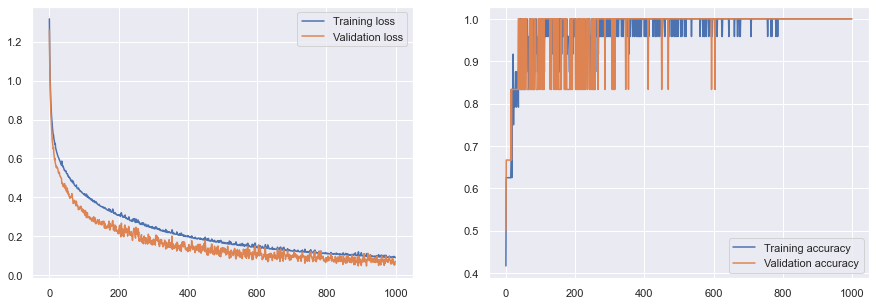

In [86]:
history = model.fit(X_train, y_train, 
                    epochs = 1000, 
                    batch_size = 16, 
                    validation_split = 0.2,
                    verbose = 0)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.legend()


In [81]:
### edTest(test_accuracy) ###
# Once you have near-perfect validation accuracy, time to evaluate model performance on test set 

train_accuracy = model.evaluate(X_train, y_train)[1]
test_accuracy = model.evaluate(X_test, y_test)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \n The test set accuracy for the model is {test_accuracy}')

4/4 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9667
The training set accuracy for the model is 1.0    
 The test set accuracy for the model is 0.9666666388511658
